This script is being used to update the Origins paper with additional info from PEW

In [73]:
import pyreadstat
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [148]:
df, meta = pyreadstat.read_sav('./W98_Oct21/ATP W98.sav')

type_community = 'COMTYPE2_W98'
# 1 Urban
# 2 Suburban
# 3 Rural


phi = 'FAMNEAR_W98'
# 1 All or Most within 1 hour's drive
# 2 Some
# 3 Only a few
# 4 None
# 5 I don't have extended family


df = df[['COMTYPE2_W98','FAMNEAR_W98']]
for i in df.columns:
    df = df[df[i]!=99]
    print(i, df[i].unique())




df['FAMNEAR_W98'] = 6-df['FAMNEAR_W98'] # Reverse so COMTYPE is ordered with Population
# 1 All or Most within 1 hour's drive   -> 5
# 2 Some                                -> 4
# 3 Only a few                          -> 3
# 4 None                                -> 2
# 5 I don't have extended family        -> 1
df = df[df['FAMNEAR_W98']>1]


df['COMTYPE2_W98'] = 4-df['COMTYPE2_W98'] # Reverse so COMTYPE is ordered with Population
# 1 Urban       -> 3
# 2 Suburban    -> 2
# 3 Rural       -> 1


COMTYPE2_W98 [2. 3. 1.]
FAMNEAR_W98 [2. 4. 1. 3. 5.]


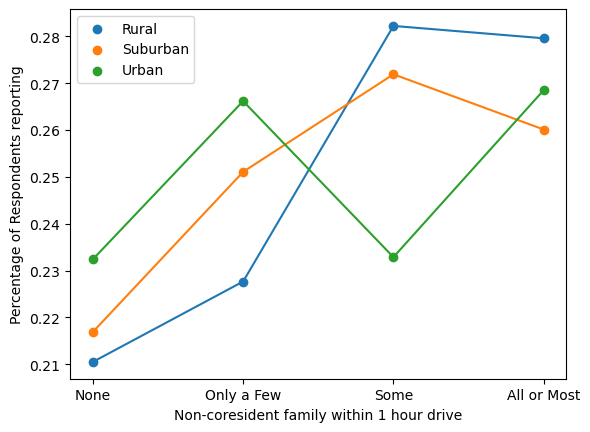

In [149]:
for i in range(1,4):
    tdf = df[df['COMTYPE2_W98']==i].copy()
    tdf = tdf.groupby('FAMNEAR_W98').count()
    tdf = tdf.reset_index()
    tdf['COMTYPE2_W98'] = tdf['COMTYPE2_W98']/tdf['COMTYPE2_W98'].sum()
    plt.scatter(tdf['FAMNEAR_W98'], tdf['COMTYPE2_W98'], label=['Rural','Suburban','Urban'][i-1])
    plt.plot(tdf['FAMNEAR_W98'], tdf['COMTYPE2_W98'], )

plt.xticks([2,3,4,5], ['None','Only a Few','Some','All or Most'])
plt.xlabel('Non-coresident family within 1 hour drive')
plt.ylabel('Percentage of Respondents reporting')
plt.legend()

In [150]:
tdf = df.groupby('COMTYPE2_W98').mean().reset_index()
tdf

COMTYPE2_W98  FAMNEAR_W98
0           1.0     3.631000
1           2.0     3.575305
2           3.0     3.537559

In [151]:
tdf = df.copy()
tdf['ANY_FAM'] = tdf['FAMNEAR_W98'].apply(lambda x: 1 if x > 3 else 0) 
tdf = tdf[['COMTYPE2_W98', 'ANY_FAM']]

tdf_std = tdf.groupby('COMTYPE2_W98').std().reset_index()
tdf_mean = tdf.groupby('COMTYPE2_W98').mean().reset_index()
tdf_cnt = tdf.groupby('COMTYPE2_W98').count().reset_index()

# display(tdf_std)
# display(tdf_mean)
# display(tdf_cnt)
# tdf

# Get the confidence intervals

In [152]:
df['FAMNEAR_W98'].unique()

array([4., 2., 5., 3.])

1103
478
495


Pop      Prob    ci_low   ci_high
0  1.0  0.210480  0.193747  0.227213
1  2.0  0.216870  0.205663  0.228274
2  3.0  0.232394  0.214554  0.250235

1277
517
567


Pop      Prob    ci_low   ci_high
0  1.0  0.227653  0.210480  0.244826
1  2.0  0.251081  0.239284  0.263075
2  3.0  0.266197  0.247418  0.284977

1383
641
496


Pop      Prob    ci_low   ci_high
0  1.0  0.282255  0.263760  0.300749
1  2.0  0.271923  0.259733  0.284113
2  3.0  0.232864  0.215023  0.250704

1323
635
572


Pop      Prob    ci_low   ci_high
0  1.0  0.279613  0.261118  0.298107
1  2.0  0.260126  0.248132  0.272316
2  3.0  0.268545  0.249765  0.287324

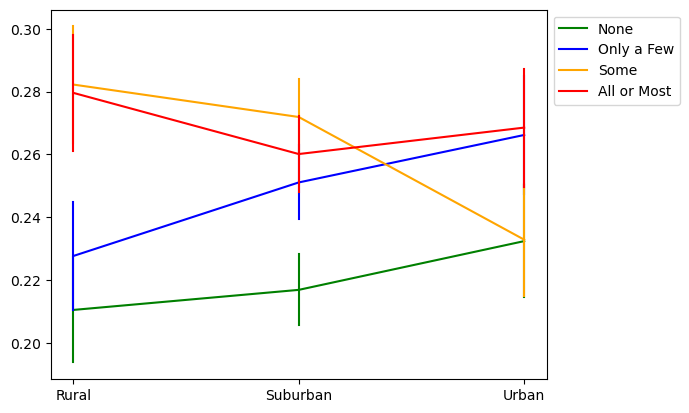

In [153]:
colors = ['_','_','green','blue','orange','red']
famlab = ['_', '_', 'None','Only a Few','Some','All or Most']

for q in range(2,6):

    data = {}
    for i in df['COMTYPE2_W98'].unique():
        tdf = df[df['COMTYPE2_W98']==i]
        data[i] = [1 if i == q else 0 for i in tdf['FAMNEAR_W98'].tolist()]
        print(sum(data[i]))

    result = {}
    conf = 0.95

    pop = []
    pr = []
    low = []
    high = []

    for k,v in sorted(data.items()):
        x = sum(v)
        n = len(v)
        p = x/n
        ci_low, ci_upp = stats.binom.interval(conf, n, p)

        pop.append(k)
        pr.append(p)
        low.append(ci_low / n)
        high.append(ci_upp / n)

    rdf = pd.DataFrame({'Pop':pop, 'Prob':pr, 'ci_low':low, 'ci_high':high})
    display(rdf)

    plt.plot(rdf['Pop'], rdf['Prob'],c=colors[q], label=famlab[q])

    for _,row in rdf.iterrows():
        plt.plot([row['Pop'], row['Pop']], [row['ci_low'], row['ci_high']], c=colors[q])

    plt.xticks([1,2,3], ['Rural','Suburban','Urban'])
    #plt.ylim(0.45, 0.6)

plt.legend(bbox_to_anchor=(1,1))

3983
1793
1635


Pop      Prob    ci_low   ci_high
0  1.0  0.789520  0.772787  0.806253
1  2.0  0.783130  0.771726  0.794337
2  3.0  0.767606  0.749765  0.785446

2706
1276
1068


Pop      Prob    ci_low   ci_high
0  1.0  0.561867  0.541612  0.582122
1  2.0  0.532049  0.518285  0.545812
2  3.0  0.501408  0.480282  0.522535

1323
635
572


Pop      Prob    ci_low   ci_high
0  1.0  0.279613  0.261118  0.298107
1  2.0  0.260126  0.248132  0.272316
2  3.0  0.268545  0.249765  0.287324

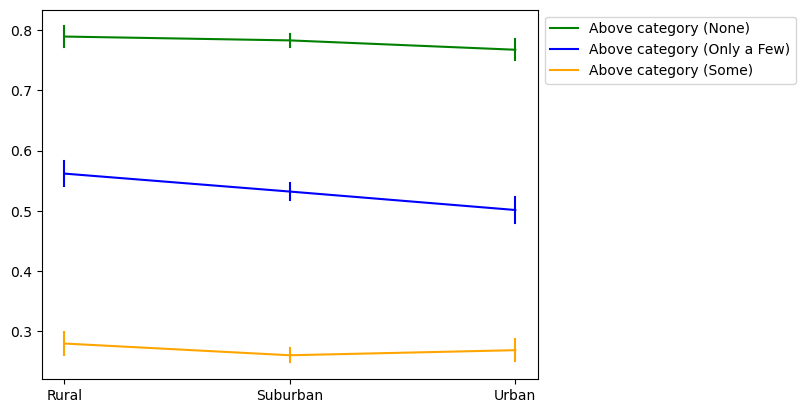

In [154]:
colors = ['_','_','green','blue','orange','red']
famlab = ['_', '_', 'None','Only a Few','Some','All or Most']

for q in range(2,5):

    data = {}
    for i in df['COMTYPE2_W98'].unique():
        tdf = df[df['COMTYPE2_W98']==i]
        data[i] = [1 if i > q else 0 for i in tdf['FAMNEAR_W98'].tolist()]
        print(sum(data[i]))

    result = {}
    conf = 0.95

    pop = []
    pr = []
    low = []
    high = []

    for k,v in sorted(data.items()):
        x = sum(v)
        n = len(v)
        p = x/n
        ci_low, ci_upp = stats.binom.interval(conf, n, p)

        pop.append(k)
        pr.append(p)
        low.append(ci_low / n)
        high.append(ci_upp / n)

    rdf = pd.DataFrame({'Pop':pop, 'Prob':pr, 'ci_low':low, 'ci_high':high})
    display(rdf)

    plt.plot(rdf['Pop'], rdf['Prob'],c=colors[q], label='Above category ('+famlab[q]+')')

    for _,row in rdf.iterrows():
        plt.plot([row['Pop'], row['Pop']], [row['ci_low'], row['ci_high']], c=colors[q])

    plt.xticks([1,2,3], ['Rural','Suburban','Urban'])
    #plt.ylim(0.45, 0.6)

plt.legend(bbox_to_anchor=(1,1))

# Combine with 2008 Data

In [155]:
df_2021 = df.copy()
df_2008 = pd.read_csv('./W98_Oct21/2008_social_trends_data_mobility.csv')

In [156]:
df_2008.columns

Index(['Unnamed: 0', 'psraid', 'int_date', 'stype', 'area', 'qlang', 'usr',
       'usr1', 'density3', 'rbcounty', 'msa', 'state', 'fips', 'CBSA', 'tz',
       'cregion', 'comp', 'form', 'qs1', 'sex', 'q1', 'q7', 'q8', 'q8a', 'q8b',
       'party', 'partyln', 'ideo', 'marital', 'kidsa', 'kidsb', 'qe1', 'qe3',
       'qe5', 'age', 'educ', 'hisp', 'race', 'relig', 'chr', 'born', 'attend',
       'income', 'zipcode', 'ql1', 'ql2', 'qc1', 'qc2', 'q12vb', 'q16vb',
       'q22avb', 'usborn1bos', 'q45vb', 'q46vb', 'raceos', 'religos',
       'phoneuse', 'recage', 'receduc', 'racethn', 'wt1', 'outwt1', 'UNTRUNC',
       'utllweight', 'utcpoweight', 'weight', 'llweight', 'cpoweight'],
      dtype='object')

In [157]:
df_2008 = df_2008[['CBSA', 'q1', 'q7', 'q8','q8a', 'q8b', 'weight']]
df_2008

CBSA               q1                  q7            q8  \
0     35620.0           A city        More than 20  More than 20   
1     35620.0  A suburban area           1 up to 5     1 up to 5   
2     35620.0           A city          6 up to 10  More than 20   
3     35620.0  A suburban area                None   11 up to 20   
4     35620.0           A city           1 up to 5     1 up to 5   
...       ...              ...                 ...           ...   
2255  37020.0     A rural area         11 up to 20     1 up to 5   
2256  34380.0     A rural area           1 up to 5    6 up to 10   
2257      NaN     A small town           1 up to 5  More than 20   
2258      NaN     A small town                None   11 up to 20   
2259      NaN     A rural area  Don’t know/Refused     1 up to 5   

                   q8a             q8b    weight  
0     Not many friends         Average  3.214286  
1              Average  Lot of friends  4.415094  
2     Not many friends         Average  4.094340  
3              Average  Lot of friends  3.754717  
4       Lot of friends  Lot of friends  1.619048  
...                ...             ...       ...  
2255    Lot of friends         Average  2.452830  
2256           Average         Average  1.169811  
2257           Average         Average  3.500000  
2258    Lot of friends  Lot of friends  2.301887  
2259    Lot of friends         Average  3.333333  

[2260 rows x 7 columns]

In [162]:
fam_lookup = {1:'No Extended Family',
              2:'None',
              3:'Only a Few',
              4:'Some',
              5:'All or Most'}

geo_lookup = {1:'Rural',
              2:'Suburban',
              3:'Urban'}

df_2021['fam_desc'] = df_2021['FAMNEAR_W98'].apply(lambda x: fam_lookup[x])
df_2021['geo_desc'] = df_2021['COMTYPE2_W98'].apply(lambda x: geo_lookup[x])
df_2021

COMTYPE2_W98  FAMNEAR_W98     fam_desc  geo_desc
0              2.0          4.0         Some  Suburban
1              1.0          2.0         None     Rural
2              2.0          5.0  All or Most  Suburban
3              2.0          2.0         None  Suburban
4              1.0          4.0         Some     Rural
...            ...          ...          ...       ...
9671           2.0          5.0  All or Most  Suburban
9672           1.0          3.0   Only a Few     Rural
9673           2.0          2.0         None  Suburban
9674           1.0          5.0  All or Most     Rural
9675           2.0          4.0         Some  Suburban

[9487 rows x 4 columns]

In [192]:
geos = ['A rural area', 'A small town', 'A suburban area', 'A city', ]
tdf = df_2008.copy()
tdf = tdf[['CBSA','q1']]
tdf = tdf[~tdf['CBSA'].isna()]
tdf = tdf[tdf['q1'].isin(geos)]
tdf['geo_idx'] = tdf['q1'].apply(lambda x: geos.index(x))
tdf['count'] = 1
tpdf = pd.pivot_table(tdf, values='count', index='CBSA', columns='q1', aggfunc='sum')
tpdf['total'] = tpdf.sum(axis=1)
#tpdf = tpdf[tpdf['total']>3]
tpdf.sort_values('total')
tpdf['city%'] = tpdf['A city'] / tpdf['total']
tpdf['suburb%'] = tpdf['A suburban area'] / tpdf['total']
tpdf['town%'] = tpdf['A small town'] / tpdf['total']
tpdf['rural%'] = tpdf['A rural area'] / tpdf['total']
tpdf = tpdf.reset_index()
tpdf = tpdf[['CBSA','city%','suburb%','town%','rural%', 'total']]
tpdf = tpdf.fillna(0)
tpdf

q1      CBSA  city%  suburb%  town%  rural%  total
0    10140.0   0.00     0.00   1.00    0.00    1.0
1    10220.0   0.00     0.00   1.00    0.00    1.0
2    10420.0   0.00     0.00   0.50    0.50    2.0
3    10460.0   0.00     0.00   1.00    0.00    1.0
4    10500.0   0.00     0.00   0.50    0.50    2.0
..       ...    ...      ...    ...     ...    ...
491  49620.0   0.50     0.00   0.50    0.00    2.0
492  49660.0   0.25     0.25   0.25    0.25    4.0
493  49700.0   0.00     0.00   0.50    0.50    2.0
494  49740.0   0.50     0.50   0.00    0.00    2.0
495  49780.0   0.00     0.00   0.50    0.50    2.0

[496 rows x 6 columns]

In [168]:
tdf['q1'].unique()

array(['A city', 'A suburban area', 'A rural area', 'A small town',
       'Don’t know/Refused'], dtype=object)

In [210]:
import re

prompt = "test_(&^@&)%+stringÄ†"

prompt = re.sub("[^A-Za-z0-9 .,:;?!()]* ", '', prompt)

s

'test_(&^@&)%+stringÄ†'